In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import utils.tavr_torch as tavr_torch
from utils.tavr_torch import TAVR_3_Frame, TAVR_1_Frame, TAVR_Sequence, tavr_dataloader
from utils.visualization import display_grid, z_stretch, visualize_frame, set_figsize, get_central_slices
from utils.loss_functions import batch_l2_loss
from utils.run_model import train, test, save, load, get_loss_history
from Models.basic_models import average_model, two_layer_basic, post_process
from Models.nm_layer import nm_layer_net, Parallel_Residual

set_figsize(20, 15)

Training directory found, 36 series
Validation directory found, 6 series
Testing directory found, 10 series


In [2]:
USE_GPU = True
dtype = torch.float32 # we will be using float throughout this tutorial
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('using device:', device)

# "Pixl", "Slice", or "None"
preproc_type = "slice"

validation = TAVR_3_Frame("__valid", preproc=preproc_type, preload=False)
val_loader = tavr_dataloader(validation, batch_size=2, shuffle=True, num_workers=2)
training = TAVR_3_Frame("__train", preproc=preproc_type, preload=False)
train_loader = tavr_dataloader(training,batch_size=1, shuffle=True, num_workers=2)


ave_model = average_model()
model = Parallel_Residual(2, [4,4],[4,1])
post_proc = post_process(kind=preproc_type).to(device=device)
loss_fn = batch_l2_loss()

# CHANGE TO NAME OF JUPYTER NOTEBOOK
model_name = "Model 26.0 (Parallel Residual+SliceNorm)"

using device: cpu


In [3]:
learning_rate = 1e-3
reg = 1e-7

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

In [4]:
LOAD = False
iteration_num = -1

if LOAD:
    load(model_name, iteration_num, model, optimizer)
    loss_history = get_loss_history(model_name)
    model.to(device=device)
    # I don't know why these lines are necessary
    # or even what the hell they do
    # but they are
    if str(device) == 'cuda':
        for state in optimizer.state.values():
            for k, v in state.items():
                state[k] = v.cuda()
else:
    loss_history = None

In [5]:
# If multiple GPU
# model = nn.DataParallel(model)

In [6]:
train(model, post_proc, optimizer, train_loader, val_loader, loss_fn, device, 
         model_name, loss_history,
          epochs=3, print_every=120, print_level=4, lr_decay=1)


Iteration 0, loss = 2.5356, corrected loss = 33.8070
Validation loss 43.8857 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-0
para_0.conv_a1.weight,   	norm: 2.9672e+00, 	update norm: 1.0392e-02 	Update/norm: 3.5024e-03
para_0.conv_a1.bias,   	norm: 2.9023e-01, 	update norm: 1.9996e-03 	Update/norm: 6.8898e-03
para_0.conv_b1.weight,   	norm: 2.7500e+00, 	update norm: 1.0392e-02 	Update/norm: 3.7787e-03
para_0.conv_b1.bias,   	norm: 1.4805e-01, 	update norm: 1.9997e-03 	Update/norm: 1.3507e-02
para_0.conv_a2.weight,   	norm: 2.9005e+00, 	update norm: 2.0782e-02 	Update/norm: 7.1651e-03
para_0.conv_a2.bias,   	norm: 9.3890e-02, 	update norm: 1.9990e-03 	Update/norm: 2.1291e-02
para_0.conv_b2.weight,   	norm: 2.8548e+00, 	update norm: 2.0780e-02 	Update/norm: 7.2791e-03
para_0.conv_b2.bias,   	norm: 9.9518e-02, 	update norm: 1.9999e-03 	Update/norm: 2.0096e-02
para_0.conv_ab1.weight,   	norm: 2.6872e+00, 	

... 1.7243... 1.6797... 2.7717
Iter 250... 2.6119... 2.1868... 2.0836
Iter 260... 4.2255... 4.9120... 4.9158
Iter 270... 3.8903... 2.5322... 3.9132
Iter 280... 1.9228... 2.9305... 4.9601
Iter 290... 1.8901... 2.4144... 4.0425
Iter 300... 3.5972... 2.4817... 2.8691
Iter 310... 3.2158... 3.2890... 2.9997
Iter 320... 2.1366... 1.3520... 3.3373
Iter 330... 3.9103... 2.0656... 1.8625
Iter 340... 4.3657... 2.9700... 2.8539
Iter 350... 2.3451... 3.3091... 5.6040
Iteration 360, loss = 2.1867, corrected loss = 23.0420
Validation loss 38.2498 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-360
para_0.conv_a1.weight,   	norm: 2.9606e+00, 	update norm: 1.9464e-05 	Update/norm: 6.5744e-06
para_0.conv_a1.bias,   	norm: 2.9214e-01, 	update norm: 5.3135e-06 	Update/norm: 1.8188e-05
para_0.conv_b1.weight,   	norm: 2.7260e+00, 	update norm: 1.6145e-05 	Update/norm: 5.9226e-06
para_0.conv_b1.bias,   	norm: 1.4990e-01, 	upda

... 1.3602... 2.2996... 2.4311
Iter 610... 1.7695... 1.7559... 3.3145
Iter 620... 3.0975... 3.1873... 2.8740
Iter 630... 2.7889... 2.4791... 3.7140
Iter 640... 3.4358.
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-645
(Epoch time: 297.83 minutes. Total epochs: 1)
.. 2.9044... 2.1316
Iter 650... 1.5553... 3.3051... 2.7427
Iter 660... 3.5725... 2.5041... 4.0896
Iter 670... 3.4524... 2.3007... 2.5383
Iter 680... 2.0469... 2.3040... 1.6675
Iter 690... 2.3623... 2.8298... 1.9490
Iter 700... 2.4184... 1.5618... 1.5322
Iter 710... 2.0353... 2.3902... 2.9592
Iteration 720, loss = 4.2255, corrected loss = 42.4715
Validation loss 38.2496 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-720
para_0.conv_a1.weight,   	norm: 2.9604e+00, 	update norm: 1.0718e-05 	Update/norm: 3.6203e-06
para_0.conv_a1.bias,   	norm: 2.9050e-01, 	update norm: 4.1222e-06 

... 2.9647... 3.1889... 3.2383
Iter 970... 1.9975... 2.4959... 2.2558
Iter 980... 4.3986... 2.5749... 1.5984
Iter 990... 2.2239... 2.5117... 3.3361
Iter 1000... 3.8903... 5.2428... 1.2356
Iter 1010... 1.7243... 1.8189... 2.2367
Iter 1020... 3.9269... 4.7936... 5.8712
Iter 1030... 1.7819... 4.2772... 7.4452
Iter 1040... 3.6755... 2.6122... 2.4950
Iter 1050... 4.2635... 1.9642... 5.1093
Iter 1060... 4.5803... 3.2984... 4.5052
Iter 1070... 4.5756... 4.5192... 4.3551
Iteration 1080, loss = 4.1462, corrected loss = 39.1882
Validation loss 38.2496 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-1080
para_0.conv_a1.weight,   	norm: 2.9603e+00, 	update norm: 1.4135e-05 	Update/norm: 4.7749e-06
para_0.conv_a1.bias,   	norm: 2.8925e-01, 	update norm: 3.9241e-06 	Update/norm: 1.3566e-05
para_0.conv_b1.weight,   	norm: 2.7259e+00, 	update norm: 9.6244e-06 	Update/norm: 3.5307e-06
para_0.conv_b1.bias,   	norm: 1.4972e

... 3.2201... 1.8164... 3.5490
Iter 1330... 1.5609... 2.9314... 3.5725
Iter 1340... 4.0786... 1.7210... 1.9675
Iter 1350... 2.2266... 3.4491... 3.6997
Iter 1360... 2.9045... 2.4995... 7.4450
Iter 1370... 3.3930... 2.1821... 4.3551
Iter 1380... 2.3496... 4.6327... 5.6846
Iter 1390... 5.0104... 2.9590... 3.9636
Iter 1400... 2.7427... 5.8731... 2.8147
Iter 1410... 1.4773... 1.6220... 3.8390
Iter 1420... 2.5322... 1.7523... 4.2210
Iter 1430... 1.8852... 1.3969... 4.3657
Iteration 1440, loss = 2.1868, corrected loss = 30.7342
Validation loss 38.2496 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-1440
para_0.conv_a1.weight,   	norm: 2.9601e+00, 	update norm: 7.0027e-06 	Update/norm: 2.3657e-06
para_0.conv_a1.bias,   	norm: 2.8799e-01, 	update norm: 4.2614e-06 	Update/norm: 1.4797e-05
para_0.conv_b1.weight,   	norm: 2.7258e+00, 	update norm: 8.3732e-06 	Update/norm: 3.0719e-06
para_0.conv_b1.bias,   	norm: 1.49

... 2.8298... 1.7324... 2.5844
Iter 1690... 2.0353... 4.6309... 2.8658
Iter 1700... 1.5077... 1.3163... 3.2890
Iter 1710... 1.6004... 2.2088... 4.9494
Iter 1720... 1.5743... 2.5086... 1.9194
Iter 1730... 2.3121... 3.2293... 5.3396
Iter 1740... 6.0919... 2.3692... 1.8869
Iter 1750... 3.1694... 2.6166... 1.8683
Iter 1760... 3.0304... 3.0945... 5.1939
Iter 1770... 4.0575... 2.2990... 1.7007
Iter 1780... 1.3519... 4.2143... 7.0651
Iter 1790... 3.9351... 3.2383... 1.9781
Iteration 1800, loss = 4.5373, corrected loss = 48.0364
Validation loss 38.2496 over 81 frames
model saved to model_checkpoints/Model 26.0 (Parallel Residual+SliceNorm)/Model 26.0 (Parallel Residual+SliceNorm)-1800
para_0.conv_a1.weight,   	norm: 2.9601e+00, 	update norm: 1.3849e-05 	Update/norm: 4.6787e-06
para_0.conv_a1.bias,   	norm: 2.8671e-01, 	update norm: 4.6863e-06 	Update/norm: 1.6345e-05
para_0.conv_b1.weight,   	norm: 2.7255e+00, 	update norm: 8.1888e-06 	Update/norm: 3.0045e-06
para_0.conv_b1.bias,   	norm: 1.49

In [7]:
# One last test + visualize results on 1 validation sequence

test(model, post_proc, val_loader, loss_fn, device)
test(ave_model, post_proc, val_loader, loss_fn, device)

Validation loss 38.2495 over 81 frames
Validation loss 38.2495 over 81 frames


tensor(38.2495)

In [8]:
with torch.no_grad():
    model.eval()
    for t, (x1, y, x2, mask, max_z) in enumerate(val_loader):
        x1 = x1.to(device=device)  # move to device, e.g. GPU
        y = post_proc(y.to(device=device))
        x2 = x2.to(device=device)
        mask = mask.to(device=device)
        max_z = max_z.to(device=device)
        
        y_hat = post_proc(model((x1, x2)))
        L2_to_ground = loss_fn((y, y_hat, mask, max_z))
        L2_to_ave = loss_fn((post_proc(ave_model((x1,x2))), y_hat, mask, max_z))
        print("Batch %d. Prediction-Real dist: %.5f, Prediction-Ave dist:%.5f"%(t, L2_to_ground.item(), L2_to_ave.item()))

Batch 0. Prediction-Real dist: 30.38501, Prediction-Ave dist:0.04893
Batch 1. Prediction-Real dist: 34.17012, Prediction-Ave dist:0.10716
Batch 2. Prediction-Real dist: 36.77880, Prediction-Ave dist:0.06032
Batch 3. Prediction-Real dist: 32.57041, Prediction-Ave dist:0.06454
Batch 4. Prediction-Real dist: 41.74625, Prediction-Ave dist:0.02246
Batch 5. Prediction-Real dist: 37.02292, Prediction-Ave dist:0.05257
Batch 6. Prediction-Real dist: 35.12347, Prediction-Ave dist:0.06090
Batch 7. Prediction-Real dist: 41.85079, Prediction-Ave dist:0.03777
Batch 8. Prediction-Real dist: 31.85626, Prediction-Ave dist:0.05519
Batch 9. Prediction-Real dist: 35.61261, Prediction-Ave dist:0.04528
Batch 10. Prediction-Real dist: 48.74812, Prediction-Ave dist:0.01898
Batch 11. Prediction-Real dist: 32.15023, Prediction-Ave dist:0.03829
Batch 12. Prediction-Real dist: 36.08208, Prediction-Ave dist:0.07517
Batch 13. Prediction-Real dist: 33.59781, Prediction-Ave dist:0.03514
Batch 14. Prediction-Real dist

/home/shared/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


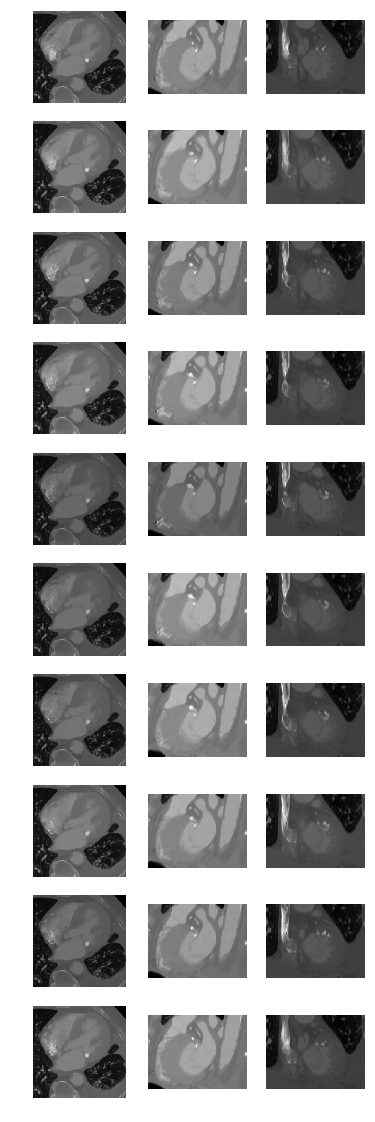

In [9]:
val_seq = TAVR_Sequence("__valid", preproc=preproc_type)
with torch.no_grad():
    model.eval()
    ave_frames = [post_proc(val_seq[0][0].to(device=device))]
    for i in range(2,9,2):
        ave_frame = model((val_seq[0][i-2][None,:].to(device=device), val_seq[0][i][None,:].to(device=device)))
        ave_frames += [post_proc(ave_frame[0][0]),  post_proc(val_seq[0][i].to(device=device))]
    ave_frames += [post_proc(val_seq[0][9].to(device=device))]
    ave_frames_slices = []
    for f in ave_frames:
        ave_frames_slices += get_central_slices(f)
    set_figsize(6,20)
    display_grid(10, 3, ave_frames_slices)